<a href="https://colab.research.google.com/github/karthi-cmd/Hobbies/blob/main/medgemma_4b_it_prev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade transformers bitsandbytes datasets evaluate peft trl scikit-learn kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.6/511.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 13.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: datasets
    Found existing installation: datasets 4.0.0
    Uninstalling datasets-4.0.0:
      Successfully uninstalled datasets-4.0.0
ERROR: pip's dependency resolv

In [2]:
!git clone https://huggingface.co/datasets/Manusinhh/medgemma_llava-med10k_dataset


Cloning into 'medgemma_llava-med10k_dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 22 (delta 1), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (22/22), 5.74 KiB | 489.00 KiB/s, done.
Filtering content: 100% (8/8), 3.17 GiB | 39.51 MiB/s, done.


In [3]:
from datasets import load_from_disk

# Load the dataset
formatted_data = load_from_disk("medgemma_llava-med10k_dataset/val")
formatted_data

Dataset({
    features: ['image', 'messages'],
    num_rows: 500
})

In [4]:
formatted_data[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x391>,
 'messages': [{'content': [{'text': None, 'type': 'image'},
    {'text': 'Analyze this medical image and provide step-by-step findings.',
     'type': 'text'}],
   'role': 'user'},
  {'content': [{'text': 'Analyzing Renal Parenchyma: A 2.2 cm clear cell carcinoma is identified on T2-weighted MRI of the left kidney.\nAnalyzing Tumor Appearance: The tumor appears “clear” based on the caption.\nAnalyzing Tumor Location: The lesion is located on the left kidney.\nFinal Answer: The patient is diagnosed with a clear cell carcinoma of the left kidney.\nWeb Search: Medical image mr clear',
     'type': 'text'}],
   'role': 'assistant'}]}

In [5]:
import os
import ast
from PIL import Image
from datasets import load_dataset
from huggingface_hub import login
import torch
from transformers import AutoProcessor, AutoModelForImageTextToText, BitsAndBytesConfig
from peft import LoraConfig
from trl import SFTTrainer, SFTConfig
from peft import get_peft_model, LoraConfig

In [15]:
hf_token= os.getenv('HF_TOKEN')
login(hf_token)

In [17]:
model_id = "google/medgemma-4b-it"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16,
)
model = AutoModelForImageTextToText.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    device_map="auto"
)

processor = AutoProcessor.from_pretrained(model_id)
processor.tokenizer.padding_side = "right"

config.json:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

In [18]:
# === Step 5: LoRA configuration ===
peft_config = LoraConfig(
    lora_alpha=16,
    lora_dropout=0.05,
    r=8,
    bias="none",
    target_modules="all-linear",
    task_type="CAUSAL_LM",
    modules_to_save=["lm_head", "embed_tokens"]
)
peft_config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=["q_proj", "o_proj", "k_proj", "v_proj", "gate_proj", "up_proj", "down_proj"],
    lora_dropout=0.05,
    task_type="CAUSAL_LM",
)

In [19]:
model = get_peft_model(model, peft_config)

In [20]:
def collate_fn(examples):
    prompts = []
    images_batch = []

    for ex in examples:
        prompt = processor.apply_chat_template(
            ex["messages"],
            tokenize=False,
            add_generation_prompt=False
        ).strip()
        prompts.append(prompt)
        images_batch.append(ex["image"])

    batch = processor(text=prompts, images=images_batch, return_tensors="pt", padding=True)

    # Print token IDs and their corresponding text
    # print(prompts)
    # print("\nToken IDs to Text Mapping:")
    for i, input_ids in enumerate(batch["input_ids"]):
        # print(f"\nSample {i+1}:")
        tokens = processor.tokenizer.convert_ids_to_tokens(input_ids)
        # for token_id, token in zip(input_ids, tokens):
        #     print(f"{token_id:>8} -> {token}")

    labels = batch["input_ids"].clone()

    # Masking logic (unchanged)
    image_token_id = [
        processor.tokenizer.convert_tokens_to_ids(
            processor.tokenizer.special_tokens_map["boi_token"]
        )
    ]
    labels[labels == processor.tokenizer.pad_token_id] = -100
    labels[labels == image_token_id] = -100
    labels[labels == 262144] = -100

    batch["labels"] = labels

    # print("\nFinal labels (with masking):")
    # print(labels)
    # print("x"*20)
    return batch

In [21]:
import os

# Correct path for Kaggle
output_dir = "medgemma-qlora-finetune"
os.makedirs(output_dir, exist_ok=True)  # Creates dir if it doesn't exist

In [22]:
training_args = SFTConfig(
    output_dir=output_dir,
    num_train_epochs=1,
    per_device_train_batch_size=1,        # optimized for low VRAM
    gradient_accumulation_steps=8,
    gradient_checkpointing=True,
    optim="adamw_torch_fused",
    learning_rate=2e-4,
    bf16=True,
    max_grad_norm=0.3,
    warmup_ratio=0.03,
    lr_scheduler_type="linear",
    save_strategy="epoch",
    push_to_hub=True,
    logging_steps=0.1,
    eval_strategy="no",  # train-only dataset
    report_to="none",
    gradient_checkpointing_kwargs={"use_reentrant": False},
    dataset_kwargs={"skip_prepare_dataset": True},
    remove_unused_columns=False,
    label_names=["labels"],
    dataloader_num_workers=8,
    dataloader_pin_memory=True
)

In [24]:
formatted_data_100 = formatted_data.select(range(100))

In [25]:
trainer = SFTTrainer(
        model=model,
        train_dataset=formatted_data_100 ,
        eval_dataset=None,
        data_collator=collate_fn,
        args=training_args,
        processing_class=processor,
        )

In [26]:
trainer.train()


The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'eos_token_id': 1, 'bos_token_id': 2, 'pad_token_id': 0}.
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Step,Training Loss
2,3.678800
4,3.362700
6,2.840900
8,2.636100
10,2.370900
12,2.207500


TrainOutput(global_step=13, training_loss=2.784167693211482, metrics={'train_runtime': 1464.0813, 'train_samples_per_second': 0.068, 'train_steps_per_second': 0.009, 'total_flos': 900893345304960.0, 'train_loss': 2.784167693211482, 'entropy': 3.8606271743774414, 'num_tokens': 41244.0, 'mean_token_accuracy': 0.6182616949081421, 'epoch': 1.0})

In [27]:
from datasets import load_from_disk

# Load the dataset
formatted_data = load_from_disk("medgemma_llava-med10k_dataset/val")
formatted_data

Dataset({
    features: ['image', 'messages'],
    num_rows: 500
})

inference

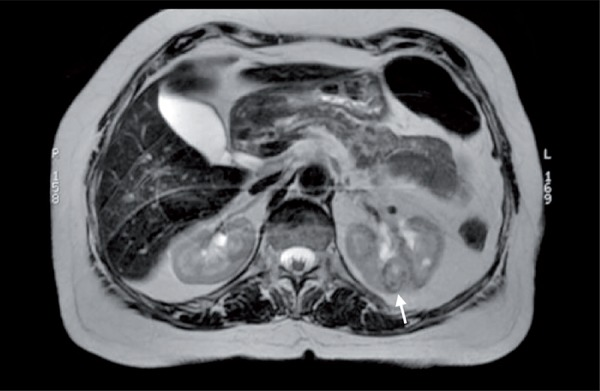

In [28]:
formatted_data[0]['image']


In [29]:
formatted_data[0]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=600x391>,
 'messages': [{'content': [{'text': None, 'type': 'image'},
    {'text': 'Analyze this medical image and provide step-by-step findings.',
     'type': 'text'}],
   'role': 'user'},
  {'content': [{'text': 'Analyzing Renal Parenchyma: A 2.2 cm clear cell carcinoma is identified on T2-weighted MRI of the left kidney.\nAnalyzing Tumor Appearance: The tumor appears “clear” based on the caption.\nAnalyzing Tumor Location: The lesion is located on the left kidney.\nFinal Answer: The patient is diagnosed with a clear cell carcinoma of the left kidney.\nWeb Search: Medical image mr clear',
     'type': 'text'}],
   'role': 'assistant'}]}

In [30]:
# import torch
# from PIL import Image
# import requests
# from transformers import AutoModelForImageTextToText, AutoProcessor
# import os

# # Disable torch.compile to avoid the "Unsupported: generator" error
# torch._dynamo.config.disable = True

# # --- Configuration ---
# # Use the model from Hugging Face Hub or your local fine-tuned checkpoint
# MODEL_PATH = "/content/medgemma-qlora-finetune/checkpoint-25"  # or "kingabzpro/medgemma-brain-cancer" if using HF Hub

# # Automatically set device and data type
# DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# # Use bfloat16 if supported (on Ampere GPUs like A100), otherwise float16
# DTYPE = torch.bfloat16 if torch.cuda.is_bf16_supported() else torch.float16

# print(f"Using device: {DEVICE}")
# print(f"Using dtype: {DTYPE}")

# # --- Load Model & Processor ---
# model = AutoModelForImageTextToText.from_pretrained(
#     MODEL_PATH,
#     torch_dtype=DTYPE,
#     device_map="auto",  # Automatically handle model placement on devices
#     trust_remote_code=True  # Add this if needed for custom model code
# )
# processor = AutoProcessor.from_pretrained(MODEL_PATH, trust_remote_code=True)
# tokenizer = processor.tokenizer

# # --- Prepare Image and Prompt ---
# # Load your image
# image = Image.open("/content/x.jpg").convert("RGB")

# # The prompt for the model
# user_prompt = "Based on the provided brain MRI, what abnormalities do you observe?"

# # --- Create Chat Template ---
# # This formats the input correctly for the MedGemma model
# chat = [
#     {
#         "role": "user",
#         "content": [
#             {"type": "image"},
#             {"type": "text", "text": user_prompt}
#         ],
#     }
# ]
# formatted_prompt = processor.apply_chat_template(chat, add_generation_prompt=True, tokenize=False)

# # --- Run Inference ---
# # Process the text and image together
# inputs = processor(text=formatted_prompt, images=image, return_tensors="pt").to(DEVICE)

# # Move inputs to correct dtype if needed
# if hasattr(inputs, 'pixel_values') and inputs.pixel_values is not None:
#     inputs.pixel_values = inputs.pixel_values.to(dtype=DTYPE)

# input_ids_len = inputs["input_ids"].shape[-1]

# # Generate a response from the model with additional safeguards
# with torch.inference_mode():
#     try:
#         output_ids = model.generate(
#             **inputs,
#             max_new_tokens=200,
#             use_cache=True,
#             do_sample=False,  # Use greedy decoding for more stable results
#             pad_token_id=tokenizer.eos_token_id,  # Explicitly set pad token
#             temperature=0.7,  # Add temperature control
#             top_p=0.9,  # Add nucleus sampling
#         )
#     except Exception as e:
#         print(f"Error during generation: {e}")
#         print("Trying with simplified generation parameters...")
#         output_ids = model.generate(
#             input_ids=inputs["input_ids"],
#             pixel_values=inputs.get("pixel_values"),
#             max_new_tokens=200,
#             pad_token_id=tokenizer.eos_token_id,
#         )

# # Decode the generated tokens to text, skipping the prompt
# response = processor.decode(output_ids[0, input_ids_len:], skip_special_tokens=True)

# # --- Output ---
# print("\n📌 Model Prediction:")
# print(response)

In [32]:
import torch
from PIL import Image
import requests
from transformers import AutoModelForImageTextToText, AutoProcessor
import os

# Disable torch.compile to avoid the "Unsupported: generator" error
torch._dynamo.config.disable = True

# --- Configuration ---
# Use the model from Hugging Face Hub or your local fine-tuned checkpoint
MODEL_PATH = "/content/medgemma-qlora-finetune/checkpoint-13"  # or "kingabzpro/medgemma-brain-cancer" if using HF Hub

# Automatically set device and data type
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
# Use bfloat16 if supported (on Ampere GPUs like A100), otherwise float16
DTYPE = torch.bfloat16 if torch.cuda.is_bf16_supported() else torch.float16

print(f"Using device: {DEVICE}")
print(f"Using dtype: {DTYPE}")

# --- Load Model & Processor ---
model = AutoModelForImageTextToText.from_pretrained(
    MODEL_PATH,
    torch_dtype=DTYPE,
    device_map="auto",  # Automatically handle model placement on devices
    trust_remote_code=True  # Add this if needed for custom model code
)
processor = AutoProcessor.from_pretrained(MODEL_PATH, trust_remote_code=True)
tokenizer = processor.tokenizer

Using device: cuda
Using dtype: torch.bfloat16


`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [33]:


# --- Prepare Image and Prompt ---
# Load your image
# image = Image.open("/content/x.jpg").convert("RGB")
image =formatted_data[0]['image']

# The prompt for the model
user_prompt = "Analyze this medical image and provide step-by-step findings."

# --- Create Chat Template ---
# This formats the input correctly for the MedGemma model
chat = [
    {
        "role": "user",
        "content": [
            {"type": "image"},
            {"type": "text", "text": user_prompt}
        ],
    }
]
formatted_prompt = processor.apply_chat_template(chat, add_generation_prompt=True, tokenize=False)

# --- Run Inference ---
# Process the text and image together
inputs = processor(text=formatted_prompt, images=image, return_tensors="pt").to(DEVICE)

# Move inputs to correct dtype if needed
if hasattr(inputs, 'pixel_values') and inputs.pixel_values is not None:
    inputs.pixel_values = inputs.pixel_values.to(dtype=DTYPE)

input_ids_len = inputs["input_ids"].shape[-1]

# Generate a response from the model with additional safeguards
with torch.inference_mode():
    try:
        output_ids = model.generate(
            **inputs,
            max_new_tokens=200,
            use_cache=True,
            do_sample=False,  # Use greedy decoding for more stable results
            pad_token_id=tokenizer.eos_token_id,  # Explicitly set pad token
            temperature=0.7,  # Add temperature control
            top_p=0.9,  # Add nucleus sampling
        )
    except Exception as e:
        print(f"Error during generation: {e}")
        print("Trying with simplified generation parameters...")
        output_ids = model.generate(
            input_ids=inputs["input_ids"],
            pixel_values=inputs.get("pixel_values"),
            max_new_tokens=200,
            pad_token_id=tokenizer.eos_token_id,
        )

# Decode the generated tokens to text, skipping the prompt
response = processor.decode(output_ids[0, input_ids_len:], skip_special_tokens=True)

# --- Output ---
print("\n📌 Model Prediction:")
print(response)

The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.



📌 Model Prediction:
Analyzing the medical image, I can identify a lesion in the left kidney.



In [34]:
print ("GT")
formatted_data[0]['messages'][1]['content'][0]['text']

GT


'Analyzing Renal Parenchyma: A 2.2 cm clear cell carcinoma is identified on T2-weighted MRI of the left kidney.\nAnalyzing Tumor Appearance: The tumor appears “clear” based on the caption.\nAnalyzing Tumor Location: The lesion is located on the left kidney.\nFinal Answer: The patient is diagnosed with a clear cell carcinoma of the left kidney.\nWeb Search: Medical image mr clear'